<a href="https://colab.research.google.com/github/pokem1402/section_project_one/blob/main/EDA_3_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load dataset

  EDA1, EDA2 과정에서 교정하고 정정한 데이터 셋을 부른다.


In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/dataset/vgames2_final.csv").drop(axis=1, columns="Unnamed: 0")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df.Year = df.Year.astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16583 entries, 0 to 16582
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16583 non-null  object 
 1   Platform     16583 non-null  object 
 2   Year         16583 non-null  int64  
 3   Genre        16583 non-null  object 
 4   Publisher    16583 non-null  object 
 5   NA_Sales     16583 non-null  float64
 6   EU_Sales     16583 non-null  float64
 7   JP_Sales     16583 non-null  float64
 8   Other_Sales  16583 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


# 2. Data Visualization

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## 1) One-variable charts

In [4]:
# (1) Platform

df.Platform = df.Platform.astype("category")

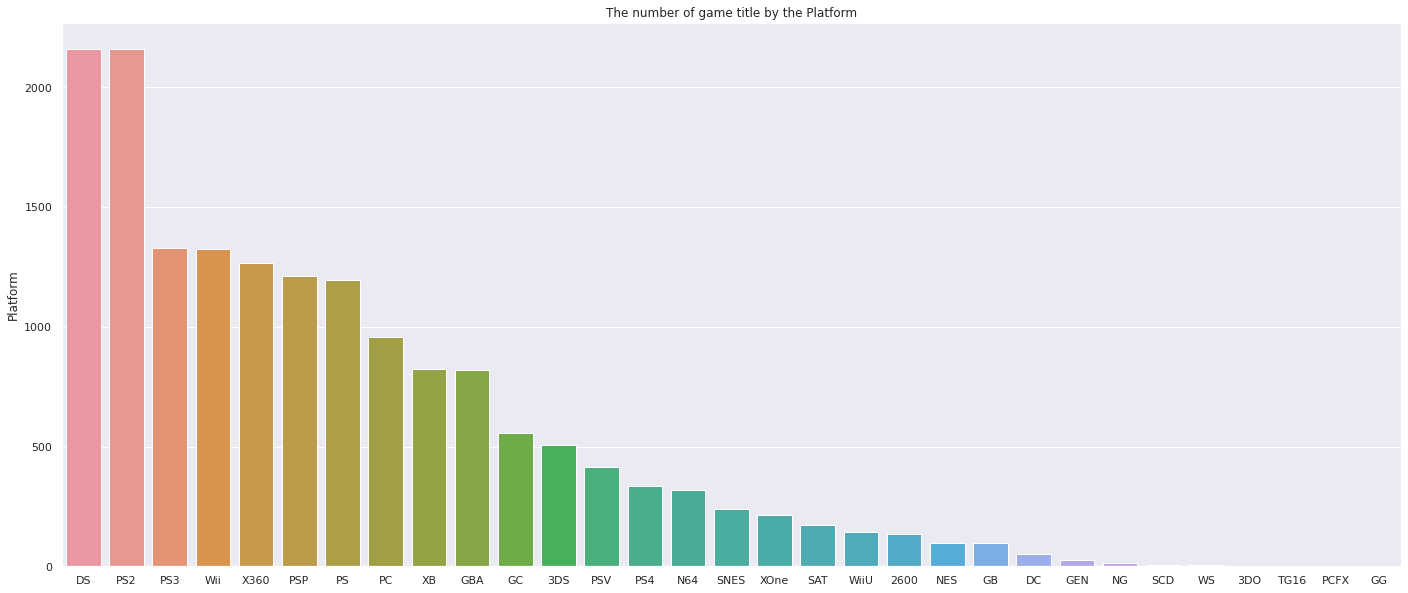

In [9]:
# (1) 플랫폼 별 타이틀 갯수

fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(20,10)})
y = df.Platform.value_counts()
x = y.index
sns.barplot(x=x, y=y, order=df.Platform.value_counts().index)
plt.title("The number of game title by the Platform")
plt.show()

In [7]:
df.Year.max()

2020

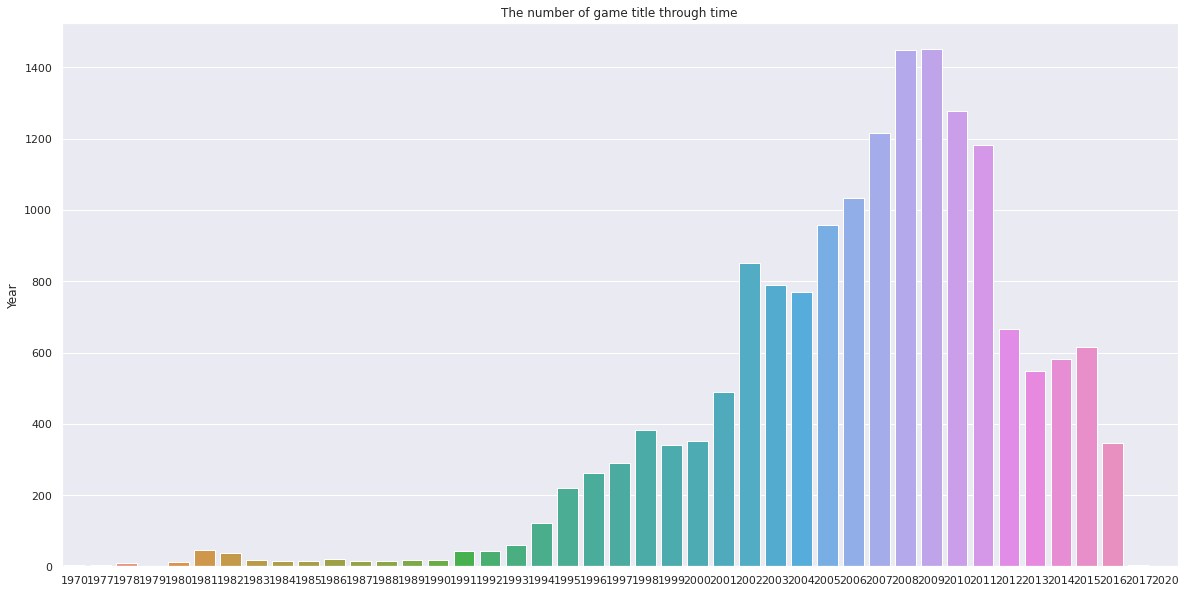

In [8]:
# (2) 연도별 출시된 타이틀 수
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(24,10)})
y = df.Year.value_counts()
x = y.index
sns.barplot(x=x, y=y)
plt.title("The number of game title through time")
plt.show()

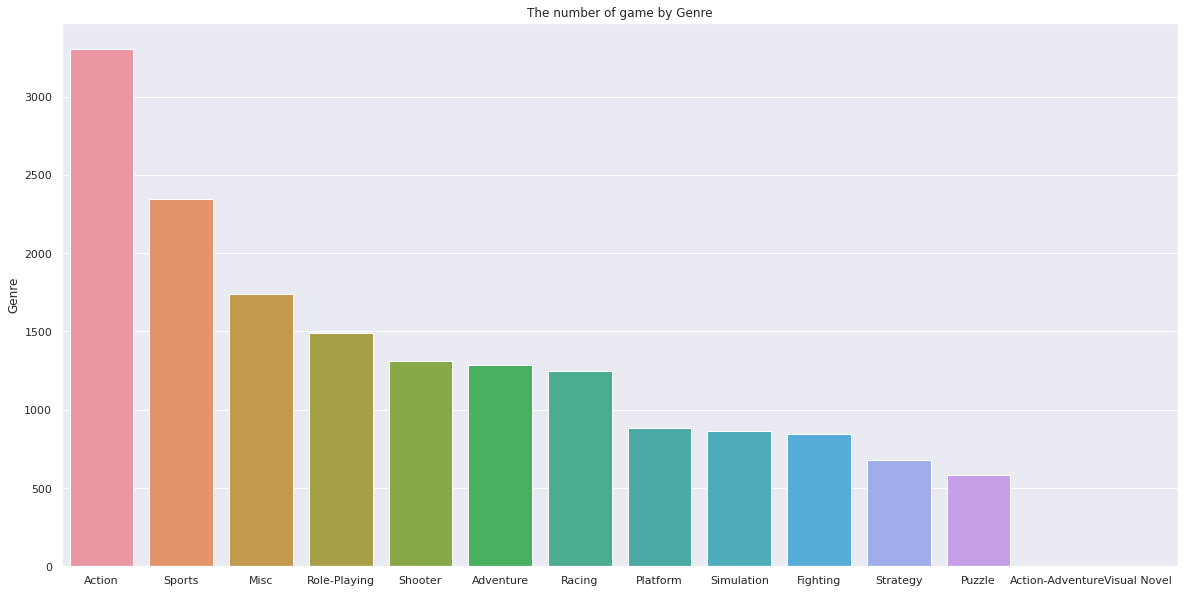

In [10]:
# (2) 장르별로 발매된 게임 타이틀 수
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(24,10)})
y = df.Genre.value_counts()
x = y.index
sns.barplot(x=x, y=y)
plt.title("The number of game by Genre")
plt.show()

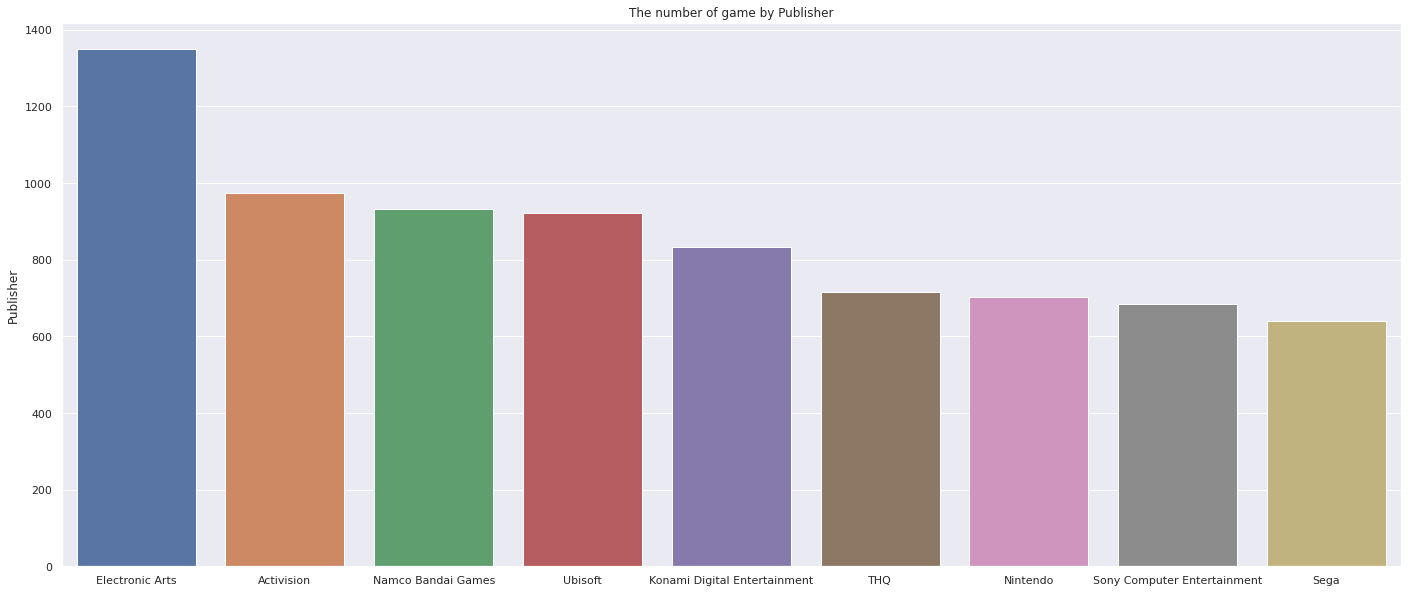

In [35]:
# (3) 퍼블리셔 별로 발매된 게임 타이틀 수
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(24,10)})
y = df.Publisher.value_counts()

x = y.index

for i in range(1000):
  if (y > i).sum() < 10:
    x= y[y>i].index
    y = y[y>i]
    break;

sns.barplot(x=x, y=y)
plt.title("The number of game by Publisher")
plt.show()

In [37]:
df_ = df.copy()

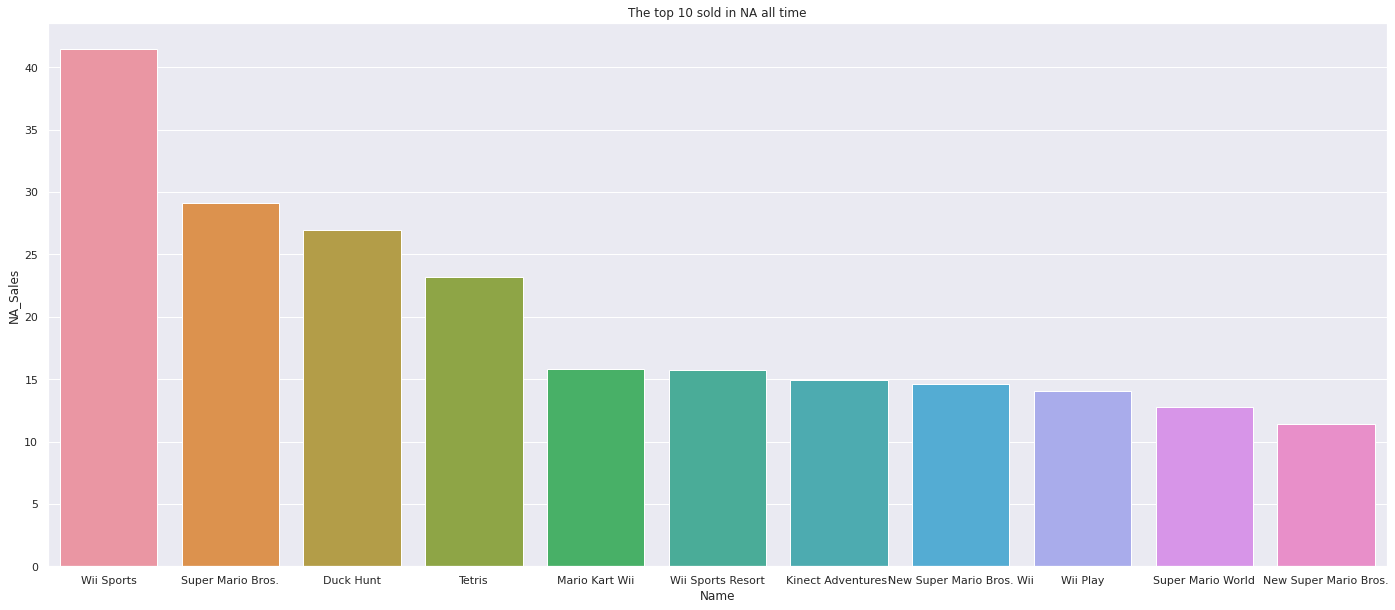

In [61]:
# (4) 북미에서 가장 많이 팔린 타이틀
df_.sort_values(["NA_Sales"], inplace=True, ascending=False)
df_.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(24,10)})
y = df_.NA_Sales.loc[:10]

x = df_.Name.loc[0:10]

sns.barplot(x=x, y=y)
plt.title("The top 10 sold in NA all time")
plt.show()

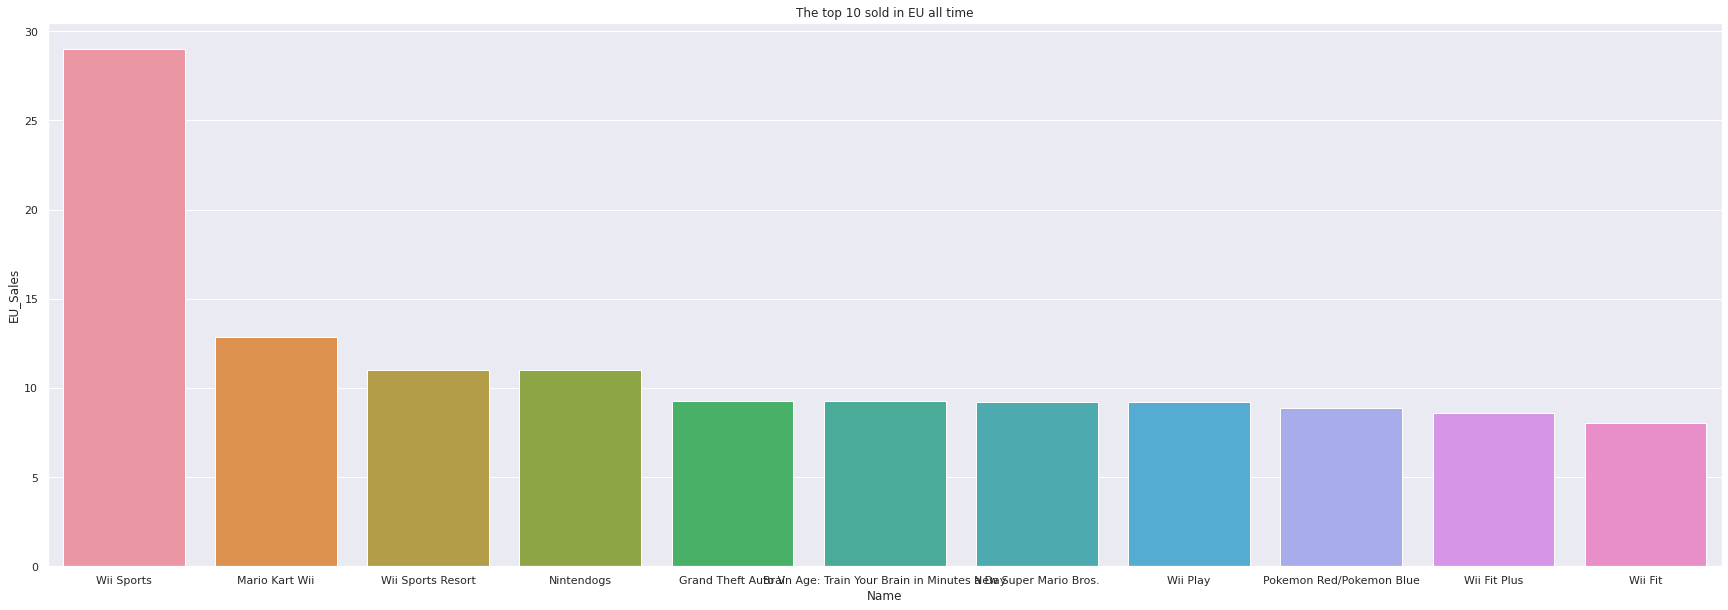

In [65]:
# (4) 유럽에서 가장 많이 팔린 타이틀
df_.sort_values(["EU_Sales"], inplace=True, ascending=False)
df_.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(30,10)})
y = df_.EU_Sales.loc[:10]

x = df_.Name.loc[0:10]

sns.barplot(x=x, y=y)
plt.title("The top 10 sold in EU all time")
plt.show()

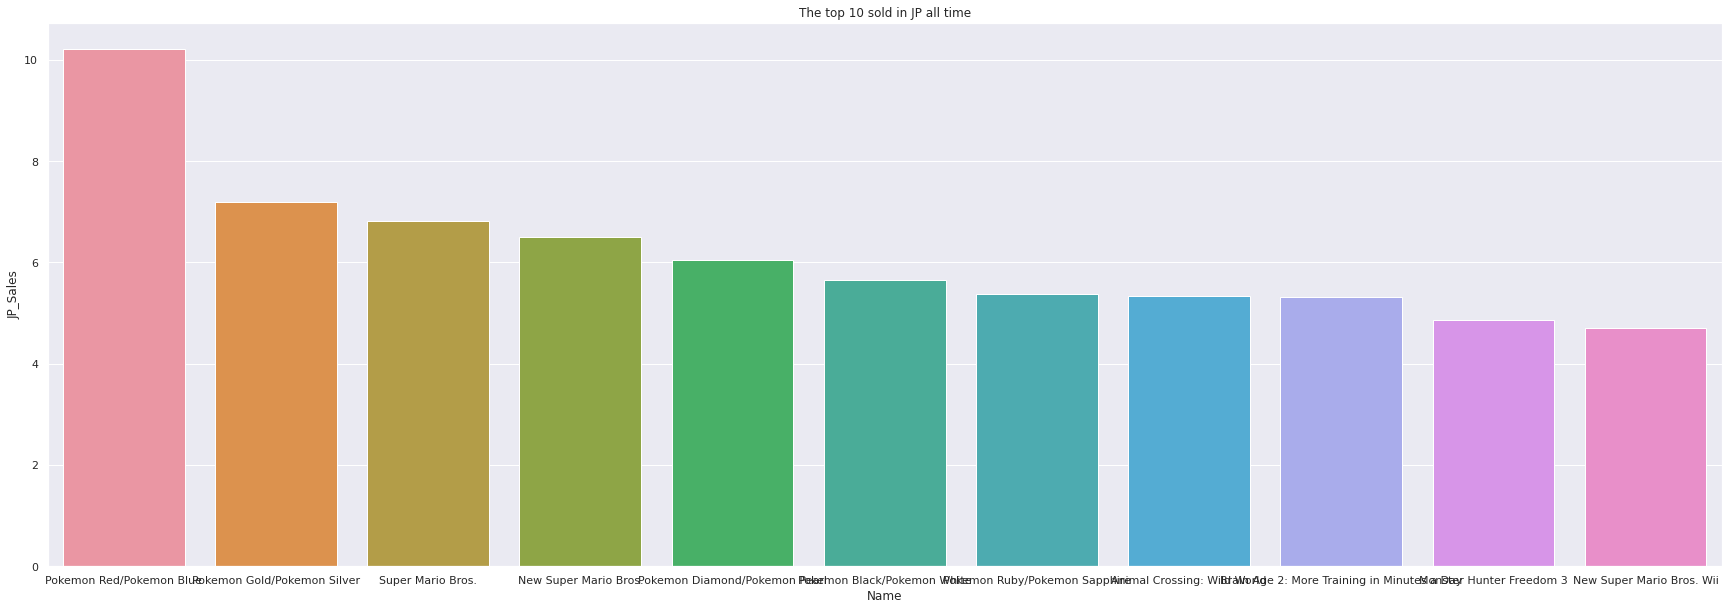

In [66]:
# (5) 일본에서 가장 많이 팔린 타이틀
df_.sort_values(["JP_Sales"], inplace=True, ascending=False)
df_.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(30,10)})
y = df_.JP_Sales.loc[:10]

x = df_.Name.loc[0:10]

sns.barplot(x=x, y=y)
plt.title("The top 10 sold in JP all time")
plt.show()

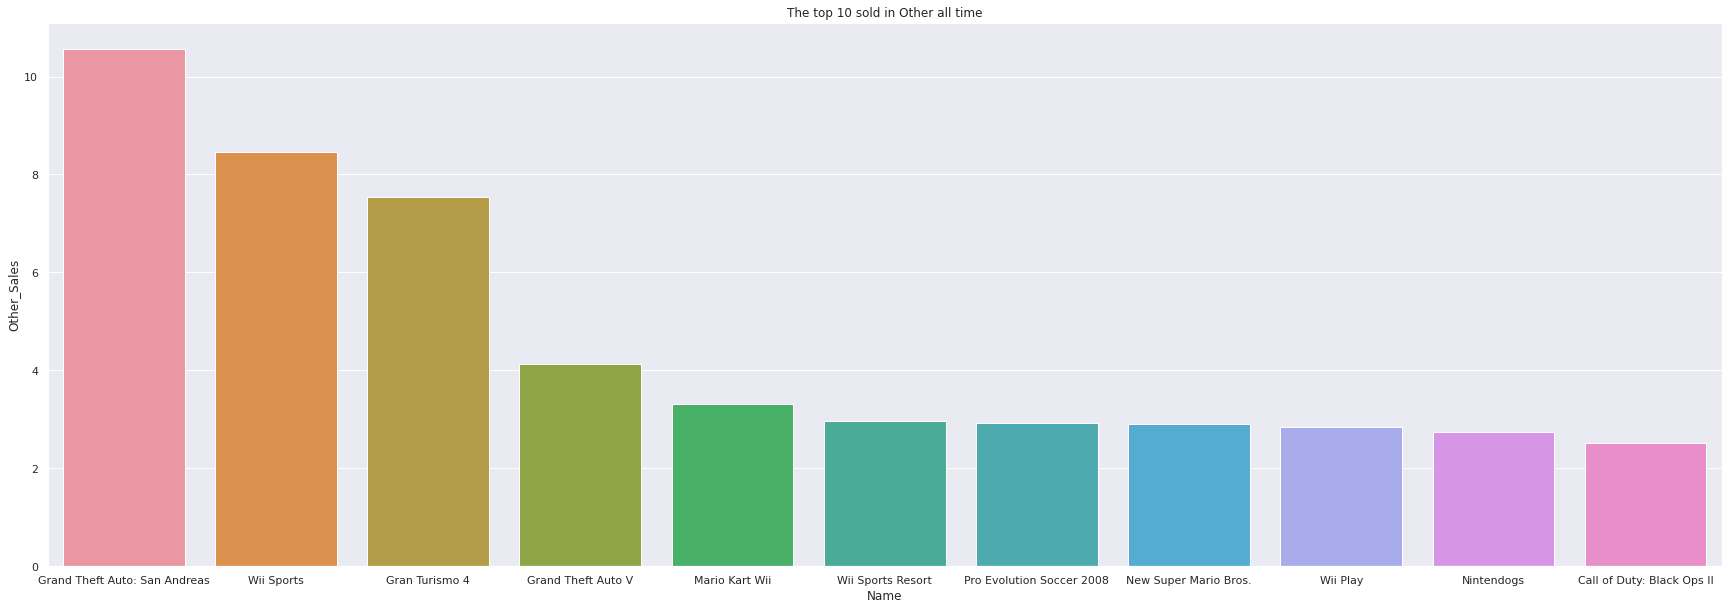

In [67]:
# (4) 유럽에서 가장 많이 팔린 타이틀
df_.sort_values(["Other_Sales"], inplace=True, ascending=False)
df_.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(30,10)})
y = df_.Other_Sales.loc[:10]

x = df_.Name.loc[0:10]

sns.barplot(x=x, y=y)
plt.title("The top 10 sold in Other all time")
plt.show()